# 对语音数据集进行统计分析

### 加载数据集

In [4]:
import os
import re
from collections import Counter
from pydub import AudioSegment
import librosa
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 假设语音数据集所在目录
audio_directory = "/home/nlp/songcw/data/ESC-50-master/audio"

# 读取CSV文件
data = pd.read_csv('/home/nlp/songcw/data/ESC-50-master/meta/esc50.csv')  # 将'your_file.csv'替换为实际的文件名

# 获取音频文件名和对应的标签
audio_filenames = data['filename'].tolist()
labels = data['target'].tolist()

# 为音频文件名添加前缀路径
audio_files = ["/home/nlp/songcw/data/ESC-50-master/audio/" + filename for filename in audio_filenames]

### 获取音频数据集的时长信息

音频时长统计：
平均时长： 5.0 s
最小时长： 5.0 s
最大时长： 5.0 s


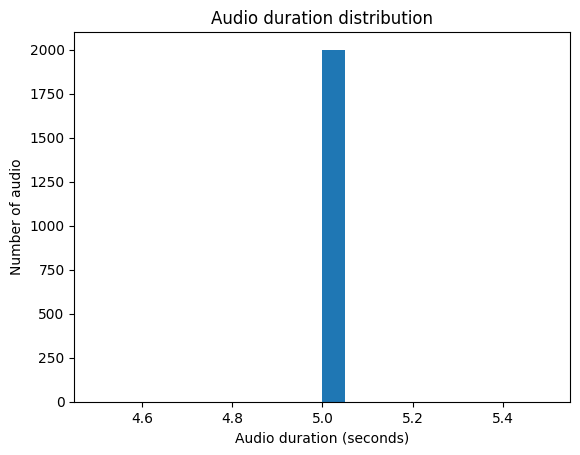

In [6]:
def get_audio_duration(directory):
    """
    获取音频数据集的时长信息
    """
    durations = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".wav") or file.endswith(".mp3"):
                audio_path = os.path.join(root, file)
                audio = AudioSegment.from_file(audio_path)
                duration = len(audio) / 1000.0  # 单位转换为秒
                durations.append(duration)
    return durations


# 统计音频时长
durations = get_audio_duration(audio_directory)
print("音频时长统计：")
print("平均时长：", np.mean(durations), "s")
print("最小时长：", np.min(durations), "s")
print("最大时长：", np.max(durations), "s")

# 绘制音频时长直方图
plt.hist(durations, bins=20)
plt.xlabel("Audio duration (seconds)")
plt.ylabel("Number of audio")
plt.title("Audio duration distribution")
plt.show()


### 获取音频数据集的采样率和声道数信息

In [7]:
def get_audio_sample_rate_and_channels(directory):
    """
    获取音频数据集的采样率和声道数信息
    """
    sample_rates = []
    channels = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".wav") or file.endswith(".mp3"):
                audio_path = os.path.join(root, file)
                audio = AudioSegment.from_file(audio_path)
                sample_rates.append(audio.frame_rate)
                channels.append(audio.channels)
    return sample_rates, channels


# 统计采样率和声道数
sample_rates, channels = get_audio_sample_rate_and_channels(audio_directory)
print("音频采样率统计：")
print("常见采样率：", Counter(sample_rates).most_common(5))
print("音频声道数统计：")
print("声道数分布：", Counter(channels).most_common())

音频采样率统计：
常见采样率： [(44100, 2000)]
音频声道数统计：
声道数分布： [(1, 2000)]


### 获取音频数据集的类别分布

In [3]:
def get_audio_category_distribution(directory):
    """
    获取音频数据集的类别分布（假设类别信息在文件名中）
    """
    category_counts = Counter()
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".wav") or file.endswith(".mp3"):
                match = re.match("^([^_]+)_", file)
                if match:
                    category = match.group(1)
                    category_counts[category] += 1
    return category_counts

# 统计音频类别分布（如果有类别信息在文件名中）
category_counts = get_audio_category_distribution(audio_directory)
print("音频类别分布：")
print(category_counts)
# 绘制类别分布柱状图
categories = list(category_counts.keys())
counts = list(category_counts.values())
plt.bar(categories, counts)
plt.xlabel("音频类别")
plt.ylabel("音频数量")
plt.title("音频类别分布")
plt.xticks(rotation=45)
plt.show()

### 获取音频数据集的MFCC特征的均值、方差统计信息

In [8]:
def get_mfcc_stats(directory):
    """
    获取音频数据集的MFCC特征的均值、方差统计信息
    """
    mfcc_means = []
    mfcc_vars = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".wav"):
                audio_path = os.path.join(root, file)
                y, sr = librosa.load(audio_path)
                mfcc = librosa.feature.mfcc(y=y, sr=sr)
                mfcc_mean = np.mean(mfcc, axis=1)
                mfcc_var = np.var(mfcc, axis=1)
                mfcc_means.append(mfcc_mean)
                mfcc_vars.append(mfcc_var)
    # 计算所有音频MFCC均值和方差的均值
    overall_mean_mean = np.mean(mfcc_means, axis=0)
    overall_mean_var = np.mean(mfcc_vars, axis=0)
    return overall_mean_mean, overall_mean_var

# 统计MFCC特征统计信息
mfcc_mean, mfcc_var = get_mfcc_stats(audio_directory)
print("MFCC特征统计：")
print("MFCC均值：", mfcc_mean)
print("MFCC方差：", mfcc_var)

MFCC特征统计：
MFCC均值： [-295.1521      76.217      -13.397432    10.5205965   -2.3127542
    5.2440233   -1.8828418    3.434695    -1.2875123    2.58334
   -1.7170699    1.9616275   -1.3073889    1.4629419   -1.7436045
    1.2926995   -1.591416     1.0756675   -1.7656488    1.3046389]
MFCC方差： [12534.522     1003.2358     531.1916     191.43016    142.74664
   103.74907     94.502556    77.13591     72.17423     61.37181
    62.17788     53.71767     52.687225    50.42257     46.240097
    41.264904    39.254177    37.699207    40.50988     39.554073]
